In [2]:
import pandas as pd
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
#nltk.download('punkt')
#nltk.download('wordnet')

pd.set_option('display.max_colwidth',None)

sns.set()


In [3]:
fiver_df=pd.read_csv(r'C:\Users\keash\OneDrive\Work\Source\Workspaces\Comments Cloud\Fiverr Comments.csv')
#print(cdf.head())
#fiver_df.info()
fiver_df['UserName'].sort_values().unique()
fiver_df.dropna(inplace=True)
#fiver_df.info()

In [4]:
fiver_df['comment_l']=fiver_df['Comment'].str.lower()
fiver_df.drop(['Comment'],axis=1,inplace=True)
fiver_df.rename(columns={'comment_l':'Comment'},inplace=True)
fiver_df['Comment']=fiver_df['Comment'].str.replace('  ',' ',regex=False)
#print(fiver_df.head())
stopwords=STOPWORDS
text=' '.join(fiver_df['Comment']).lower()
#text[:500]

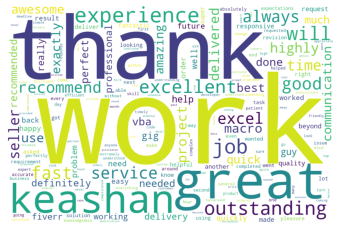

In [5]:
wordcloud=WordCloud(collocations=False,
width=1200,height=800,
background_color='white',
stopwords=stopwords)

wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

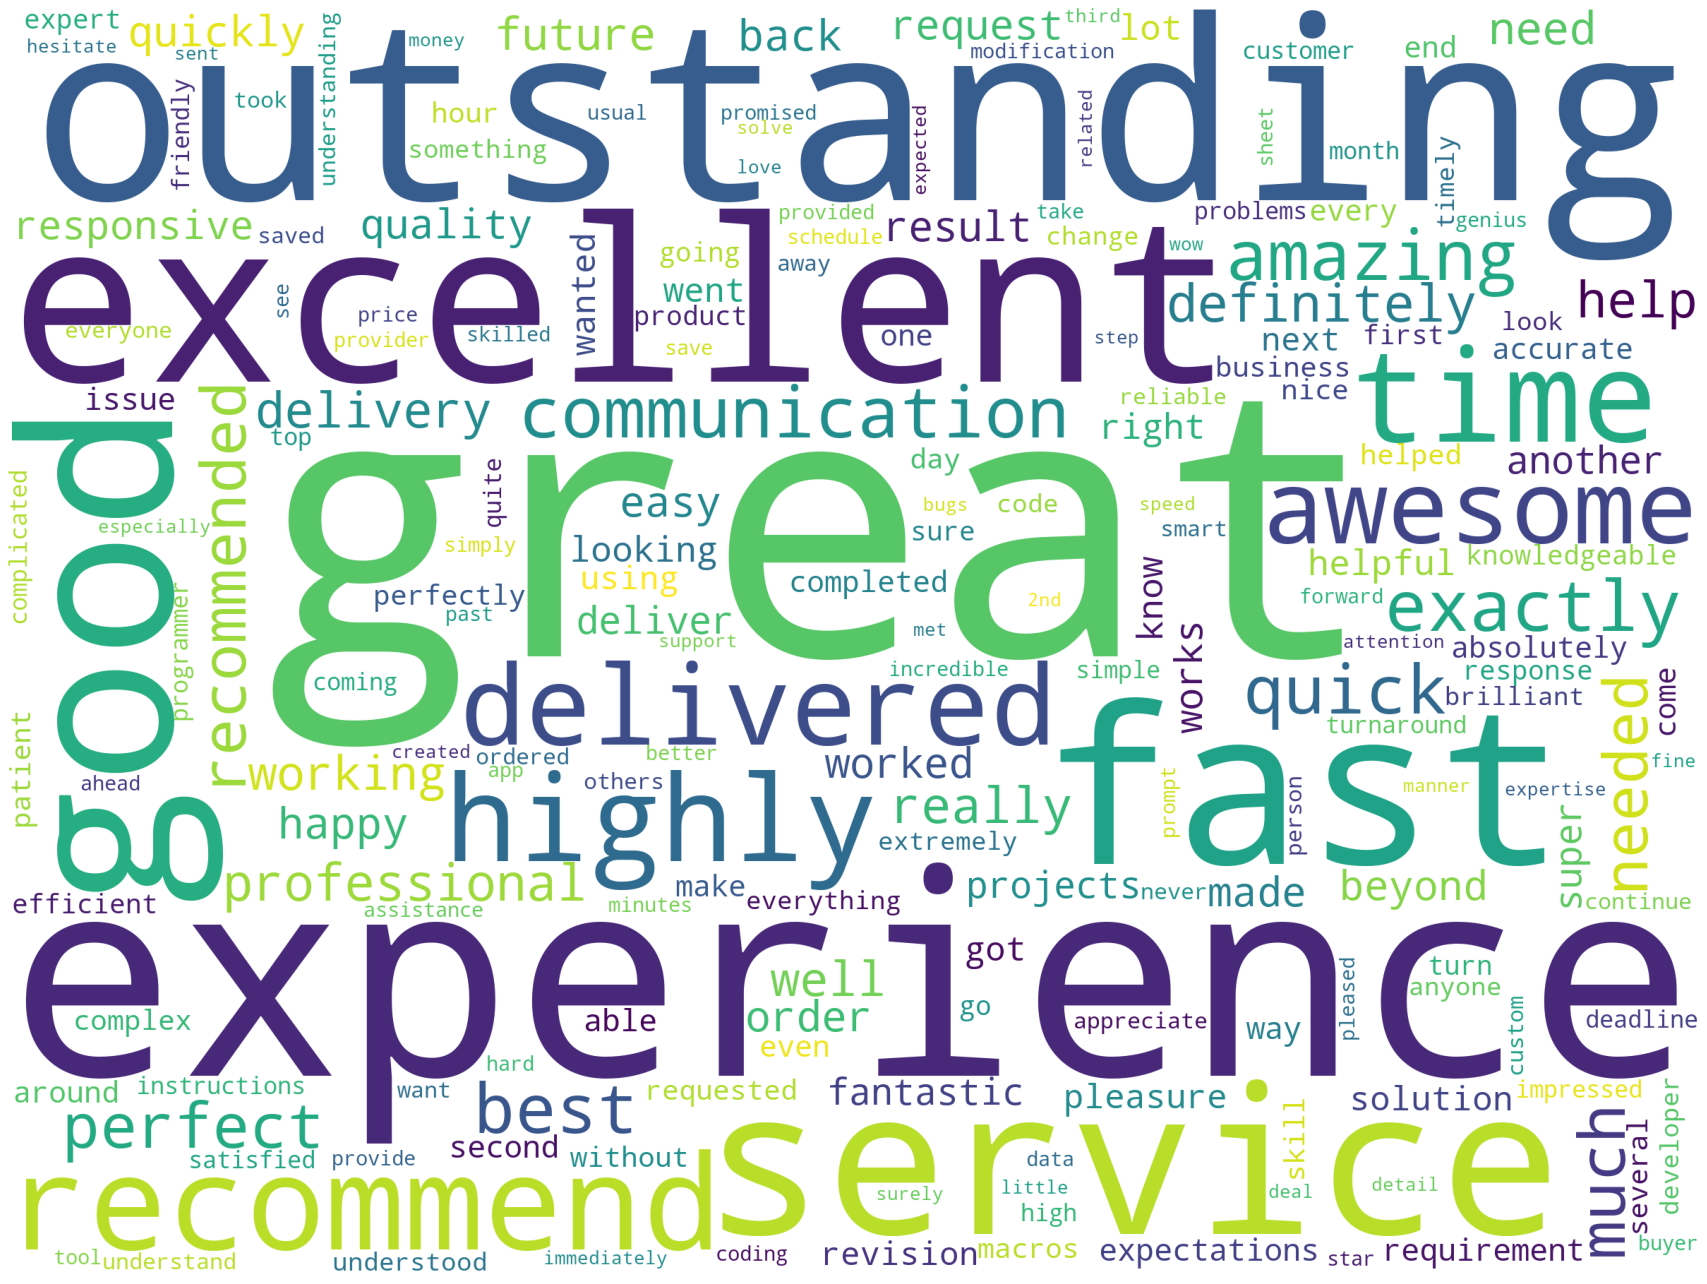

In [14]:
stopwords.update(['keashan','work','thank','will','always','excel','thanks','job','use','seller','guy','macro','problem','vba','project','asked','within','many','task','sellers','fiverr','ask','gig','hire','done',])

wordcloud=WordCloud(collocations=False,
width=2400,height=1800,
background_color='white',
stopwords=stopwords)

wordcloud.generate(text)
plt.figure(figsize= (24, 18))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
tokens=[word for word in word_tokenize(text) if word.isalpha()]
final_words=[word for word in tokens if word not in stopwords]
final_words[:20]

['extremely',
 'easy',
 'communicating',
 'needs',
 'easy',
 'made',
 'process',
 'fast',
 'painless',
 'tool',
 'created',
 'accurate',
 'even',
 'went',
 'beyond',
 'identifying',
 'way',
 'improve',
 'outcome',
 'pleased']

In [23]:
word_count=Counter(final_words)
for word in word_count.most_common(100):
    print(word[0]+':' + str(word[1])+' mentions')

great:225 mentions
experience:142 mentions
outstanding:111 mentions
excellent:101 mentions
fast:92 mentions
good:87 mentions
service:74 mentions
recommend:70 mentions
time:60 mentions
highly:58 mentions
delivered:57 mentions
awesome:50 mentions
exactly:44 mentions
amazing:43 mentions
best:41 mentions
communication:41 mentions
quick:40 mentions
much:36 mentions
recommended:34 mentions
perfect:34 mentions
needed:33 mentions
definitely:33 mentions
professional:31 mentions
help:30 mentions
really:30 mentions
delivery:29 mentions
well:27 mentions
working:26 mentions
future:24 mentions
happy:22 mentions
back:22 mentions
easy:21 mentions
quickly:21 mentions
worked:20 mentions
made:19 mentions
beyond:19 mentions
quality:19 mentions
responsive:18 mentions
order:18 mentions
another:17 mentions
works:17 mentions
fantastic:16 mentions
need:16 mentions
projects:16 mentions
right:15 mentions
looking:15 mentions
super:15 mentions
helpful:15 mentions
went:14 mentions
pleasure:14 mentions
got:14 mentio

In [24]:
lemmatizer=WordNetLemmatizer()
lemmatized_words=[lemmatizer.lemmatize(word) for word in final_words]
new_word_count=Counter(lemmatized_words)
for word in new_word_count.most_common(100):
    print(word[0]+':' + str(word[1])+' mentions')

great:226 mentions
experience:142 mentions
outstanding:111 mentions
excellent:101 mentions
fast:92 mentions
good:87 mentions
service:82 mentions
recommend:70 mentions
time:65 mentions
highly:58 mentions
delivered:57 mentions
awesome:50 mentions
exactly:44 mentions
amazing:43 mentions
communication:43 mentions
best:41 mentions
quick:40 mentions
much:36 mentions
recommended:34 mentions
perfect:34 mentions
needed:33 mentions
definitely:33 mentions
professional:31 mentions
help:30 mentions
really:30 mentions
delivery:29 mentions
well:27 mentions
working:26 mentions
need:24 mentions
future:24 mentions
happy:22 mentions
back:22 mentions
easy:21 mentions
order:21 mentions
quickly:21 mentions
worked:20 mentions
result:20 mentions
made:19 mentions
beyond:19 mentions
quality:19 mentions
request:19 mentions
responsive:18 mentions
another:17 mentions
work:17 mentions
fantastic:16 mentions
project:16 mentions
know:15 mentions
right:15 mentions
looking:15 mentions
super:15 mentions
helpful:15 mentio

In [27]:
word_freq=pd.DataFrame(new_word_count.most_common(15),index=None,columns=['Word','Count'])
#word_freq.head(5)

,Word,Count
0,great,226
1,experience,142
2,outstanding,111
3,excellent,101
4,fast,92


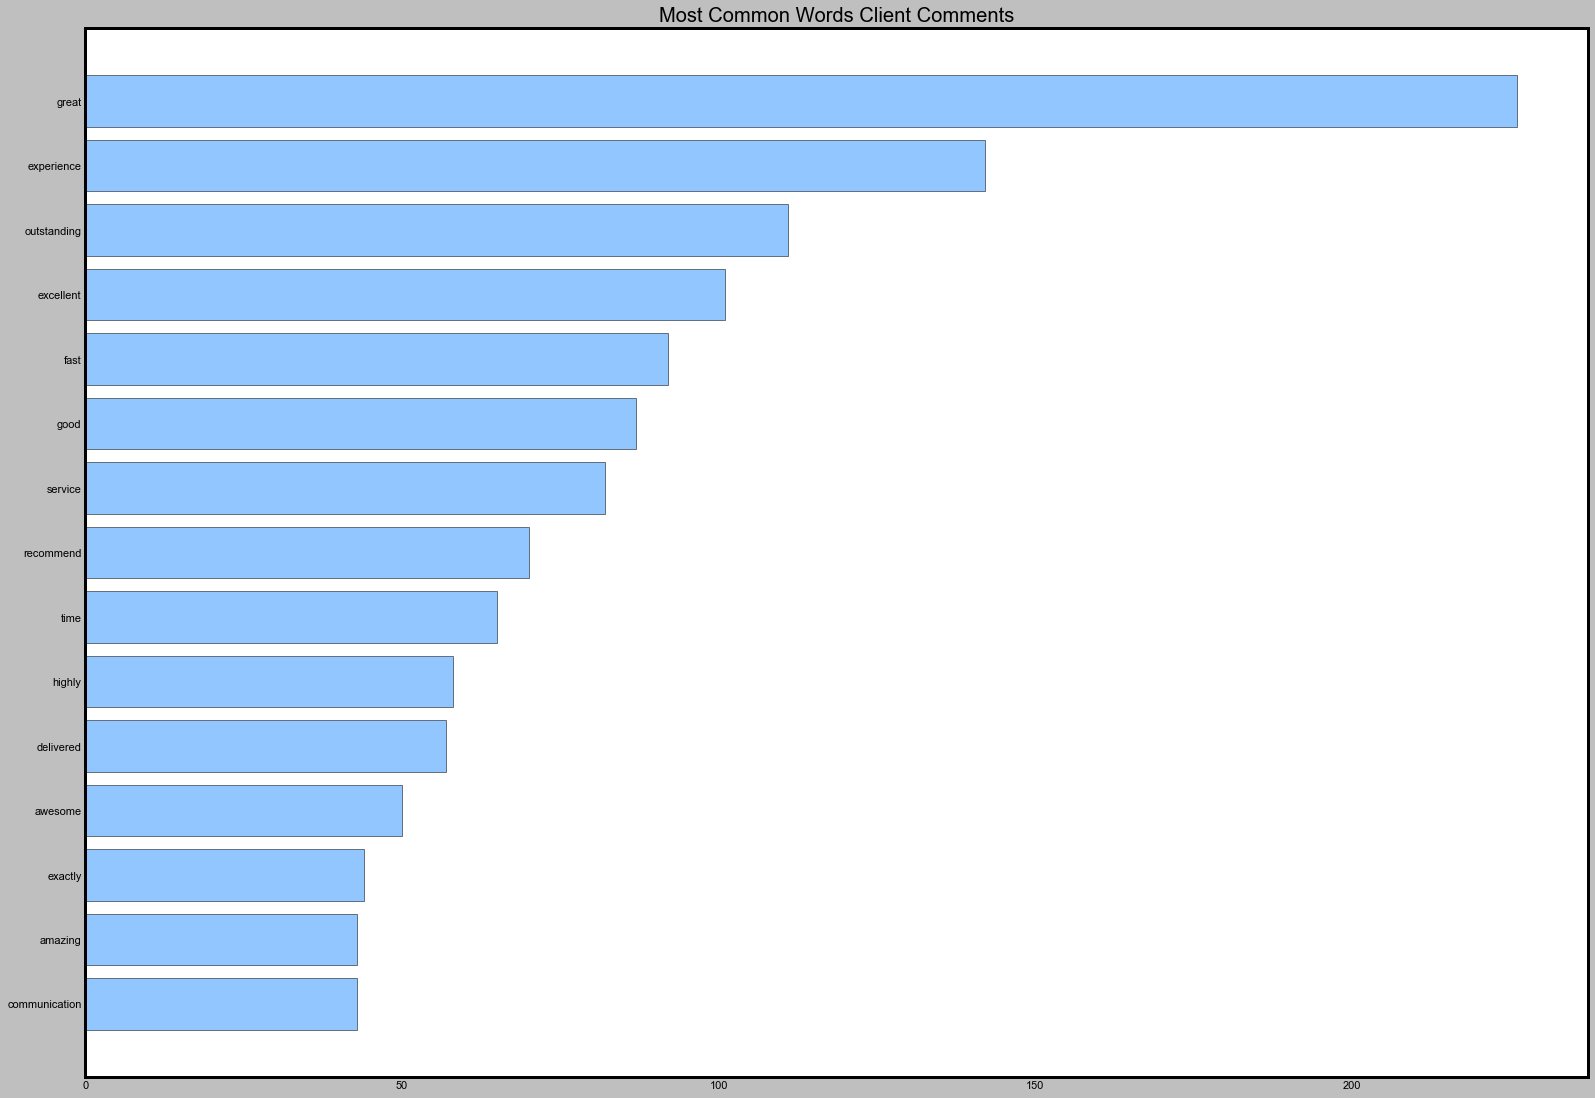

In [42]:

plt.figure(figsize= (24, 18))
plt.style.use('seaborn-pastel')
plt.barh(y=word_freq.Word,width=word_freq.Count)
plt.gca().invert_yaxis()
plt.title('Most Common Words Client Comments')
plt.grid(None)
plt.show()


In [32]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']